<a href="https://colab.research.google.com/github/amralfa/UT/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
df = pd.read_csv('foodhub_order.csv')

In [ ]:
# View the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Get the number of rows
num_rows = df.shape[0]

# Get the number of columns
num_columns = df.shape[1]

# Print the number of rows
print(f"Rows: {num_rows}")

# Print the number of columns
print(f"Columns: {num_columns}")

Rows: 1898
Columns: 9


#### Observations:
The df has 1898 rows and 9 columns, this is a simple and effective way to check the dimensions of a DataFrame.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Missing value checker
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values, the data set is complete and there is no need to impute, drop, or handle missing data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# The summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
# Extract and print the minimum, average, and maximum food preparation time
min_time = df['food_preparation_time'].min()
avg_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()

print(f"Minimum food prep time: {min_time} minutes")
print(f"Average food prep time: {round(avg_time, 2)} minutes")
print(f"Maximum food prep time: {max_time} minutes")

Minimum food prep time: 20 minutes
Average food prep time: 27.37 minutes
Maximum food prep time: 35 minutes


#### Observations:
The food preparation times range from 20 to 35 minutes, with an average of 27.37 minutes, indicating consistency and efficiency in kitchen operations.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count all ratings
rating_counts = df['rating'].value_counts()

# Show only the number of orders not rated
not_rated = rating_counts.get('Not given', 0)  # Default to 0 if 'Not given' is not present
print(f"The number of orders that are not rated: {not_rated}")

The number of orders that are not rated: 736


#### Observations:

A significant number of orders (736) are not rated, which may impact the reliability of customer feedback analysis.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

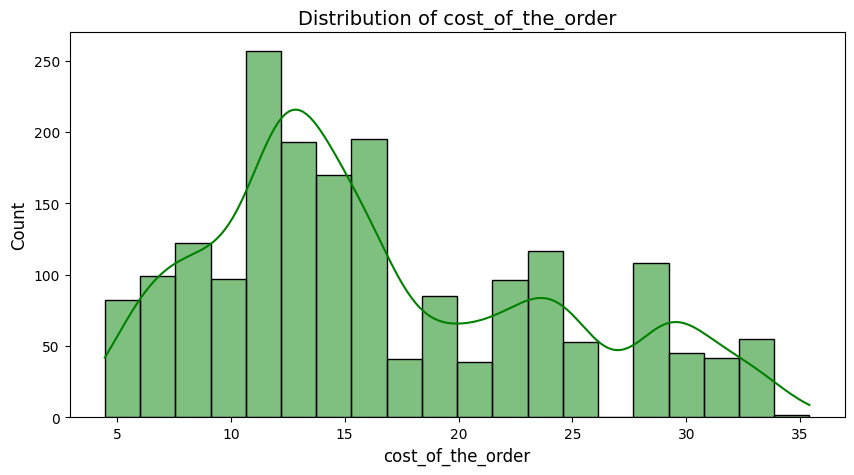

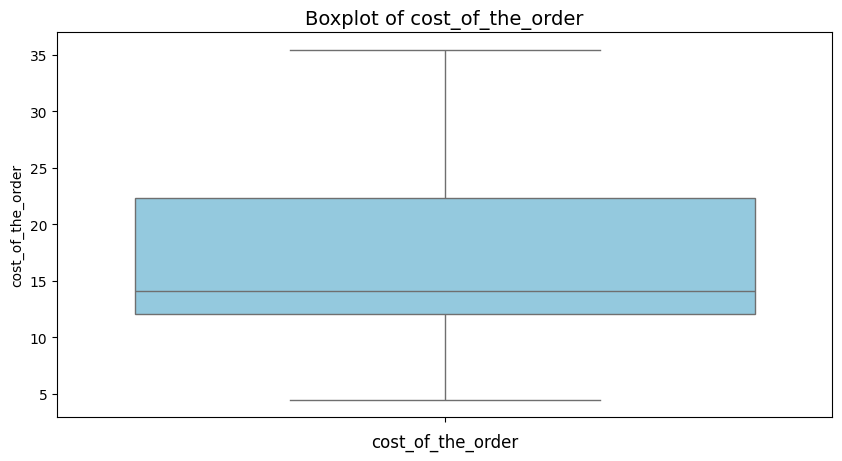

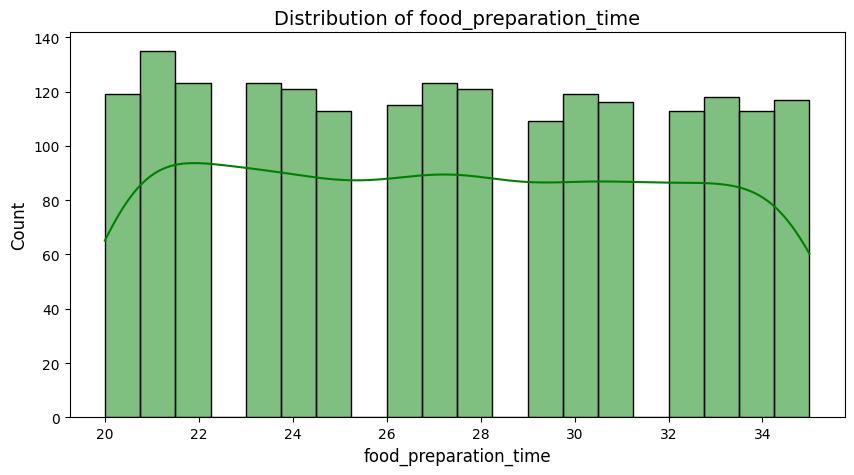

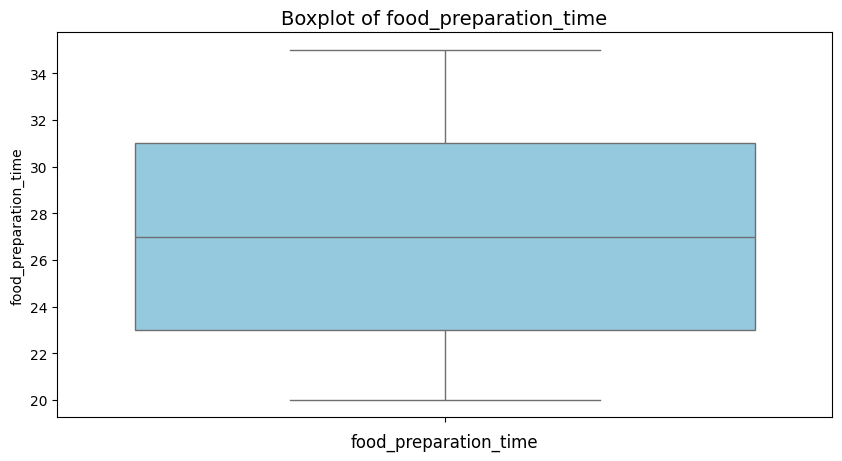

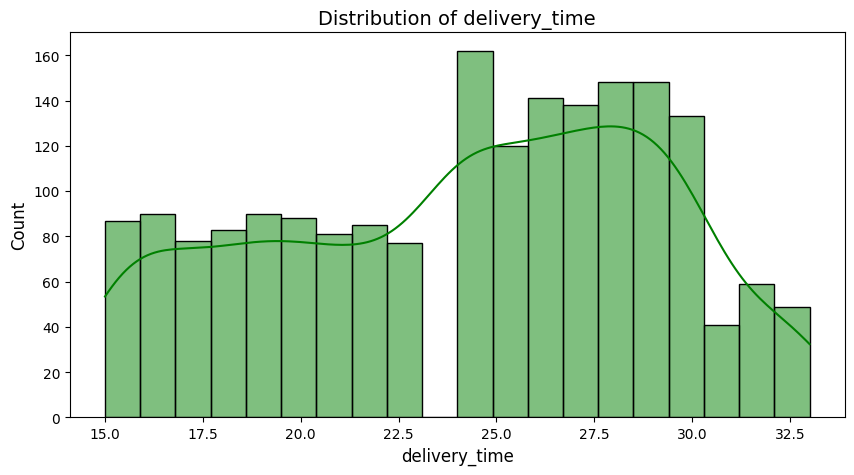

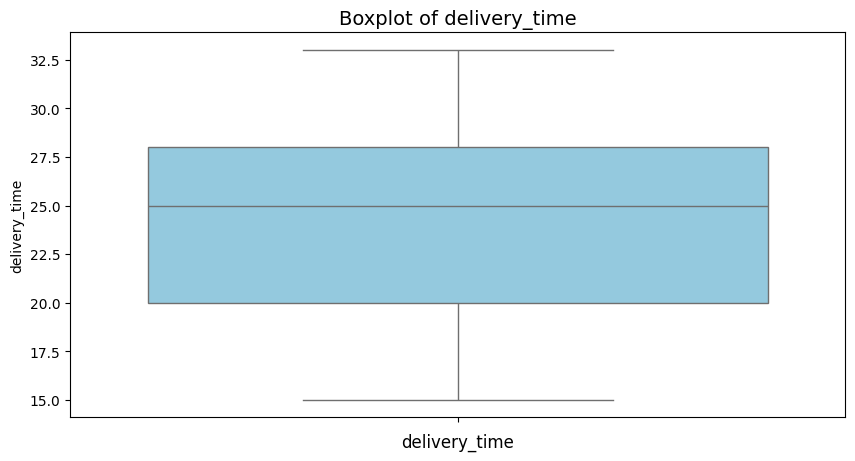

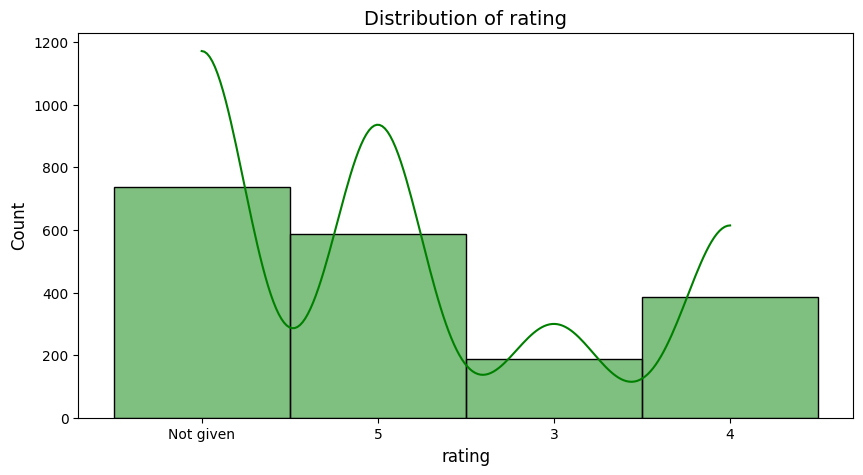

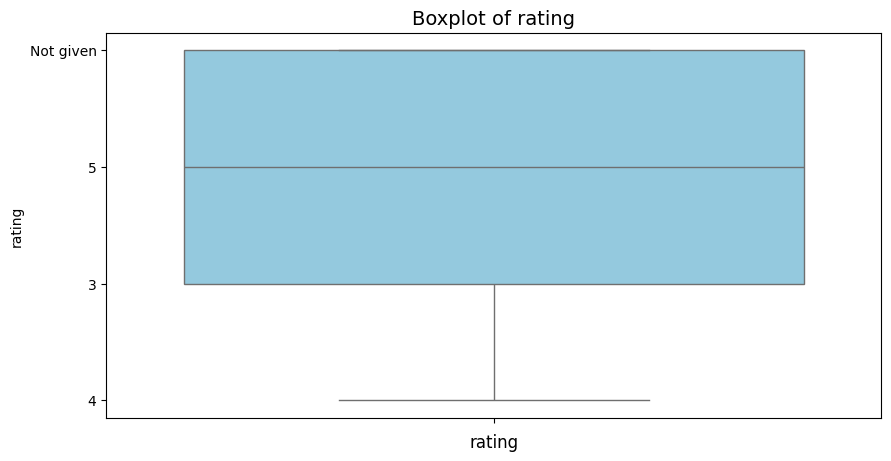

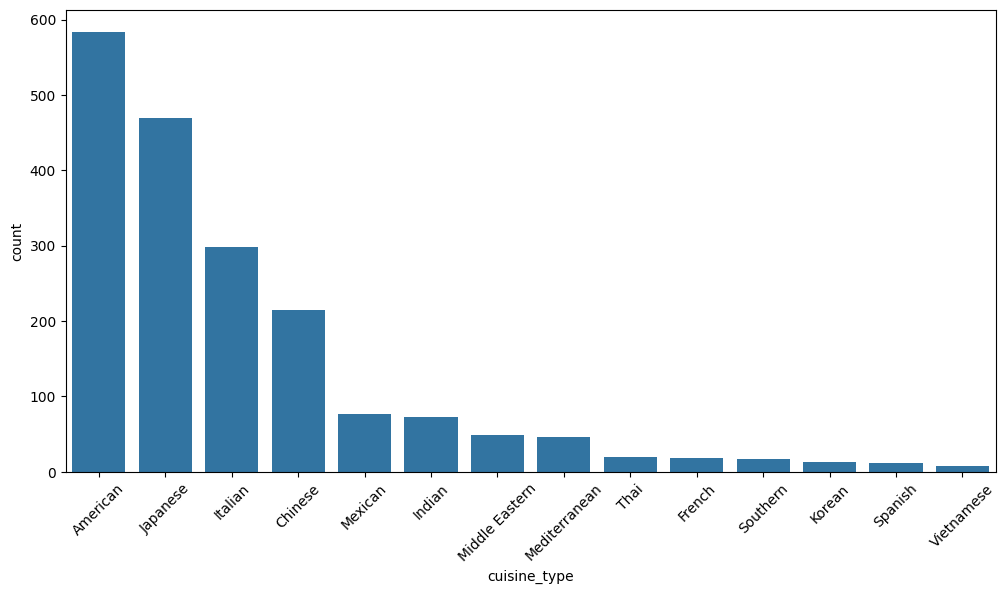

<ipython-input-34-aecb13fc2d83>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index, palette='coolwarm')


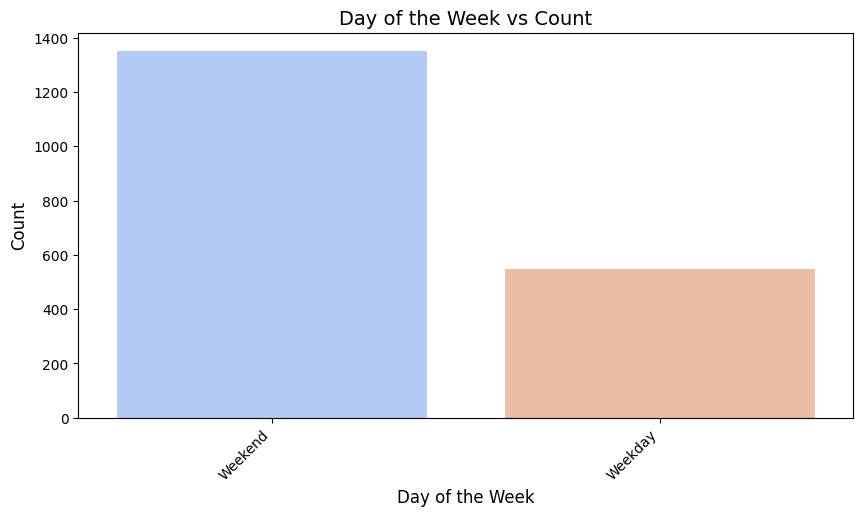

In [ ]:
# Order ID
df['order_id'].nunique()

# Customer ID
df['customer_id'].nunique()

# Restaurant name
df['restaurant_name'].nunique()

# Cuisine type
df['cuisine_type'].nunique()

# Day of the week
df['day_of_the_week'].unique()

# Rating
df['rating'].unique()

# Explore the distributions of all numeric variables
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=20, color='green')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column], color='skyblue')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.show()

# Cuisine type vs Count
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Day of the Week vs Count
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index, palette='coolwarm')
plt.title('Day of the Week vs Count', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

Shake Shack has the highest number of orders (219), followed by The Meatball Shop (132), indicating their strong popularity compared to other restaurants in the dataset.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1)

,cuisine_type
American,415


#### Observations:

American cuisine is the most popular on weekends, with 415 orders, indicating a strong preference among customers.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Percentage of the orders cost more than 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

Percentage of orders above 20 dollars: 29.24 %


#### Observations:
Approximately 29.24% of the orders cost more than $20, indicating that the majority of orders are relatively affordable.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean order delivery time
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time is', round(mean_del_time, 2), 'minutes')

The mean delivery time is 24.16 minutes


#### Observations:

The average delivery time is 24.16 minutes, indicating a relatively quick and consistent delivery service.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Top 3 count of each customer ID
df['customer_id'].value_counts().head(3)

,customer_id
52832,13
47440,10
83287,9


#### Observations:
The top three customers placed 13, 10, and 9 orders respectively, indicating repeat business from loyal customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-40-ac0b7aa772dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', palette='coolwarm')


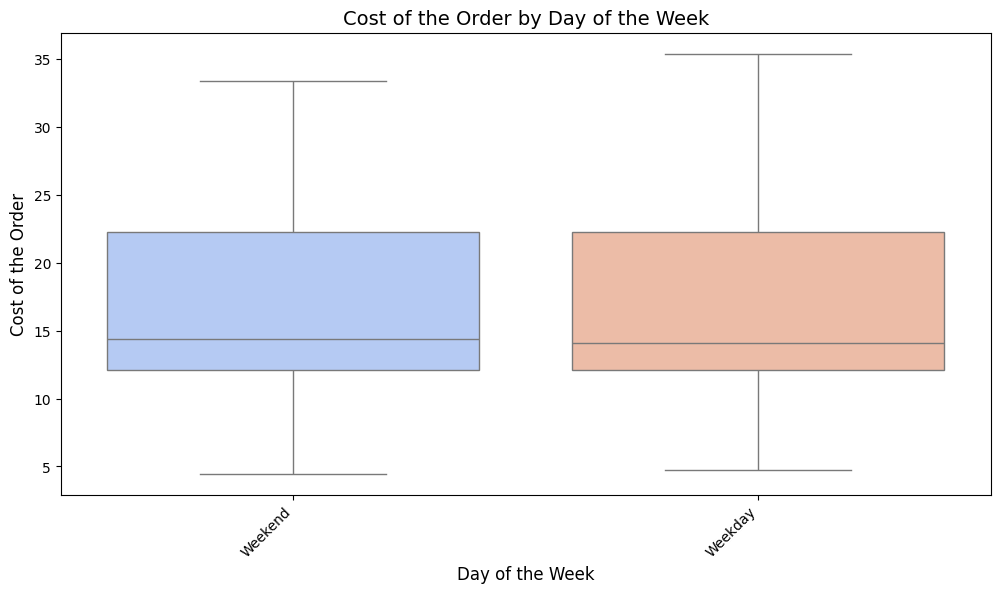

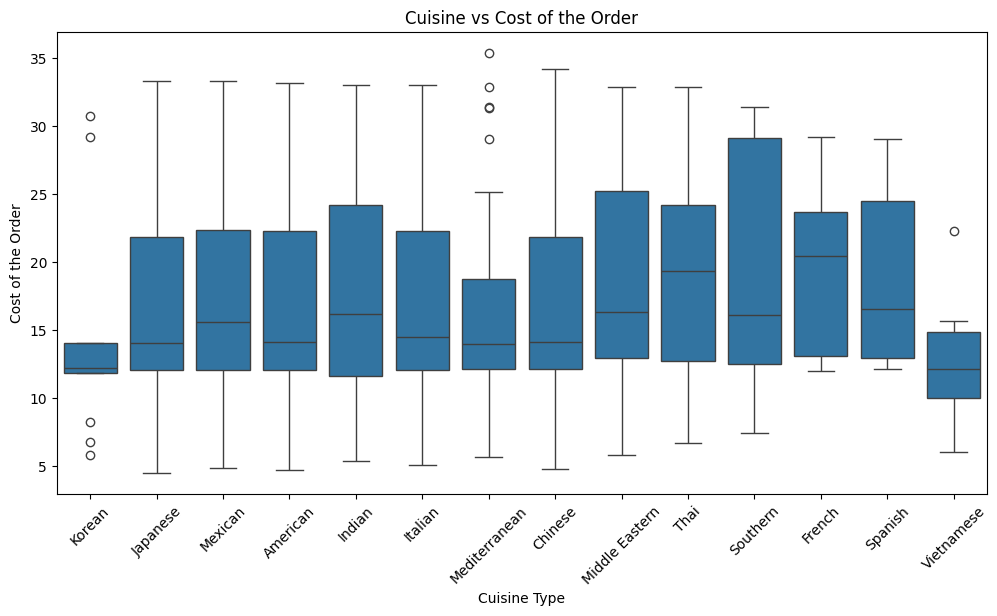

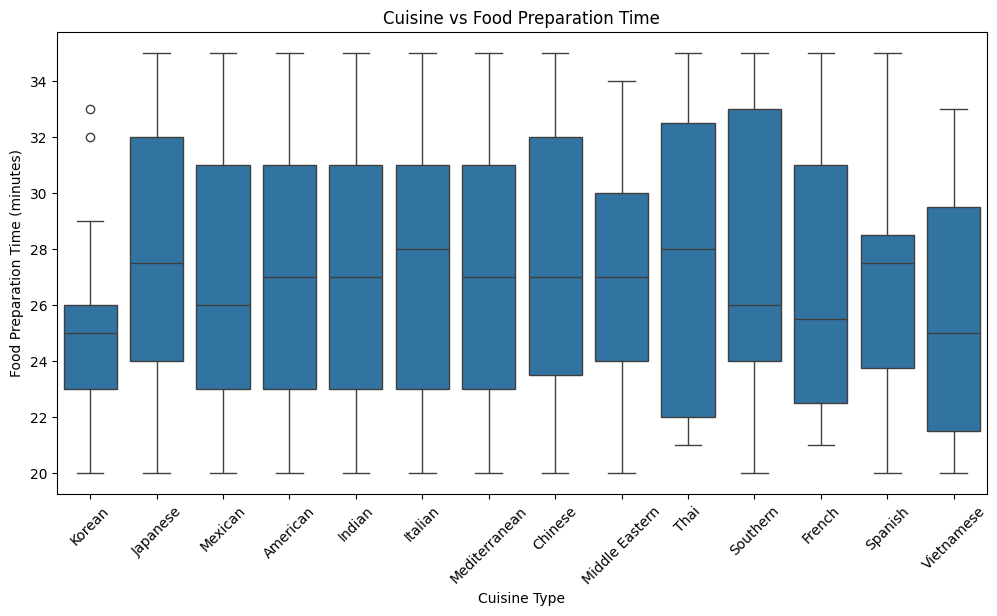

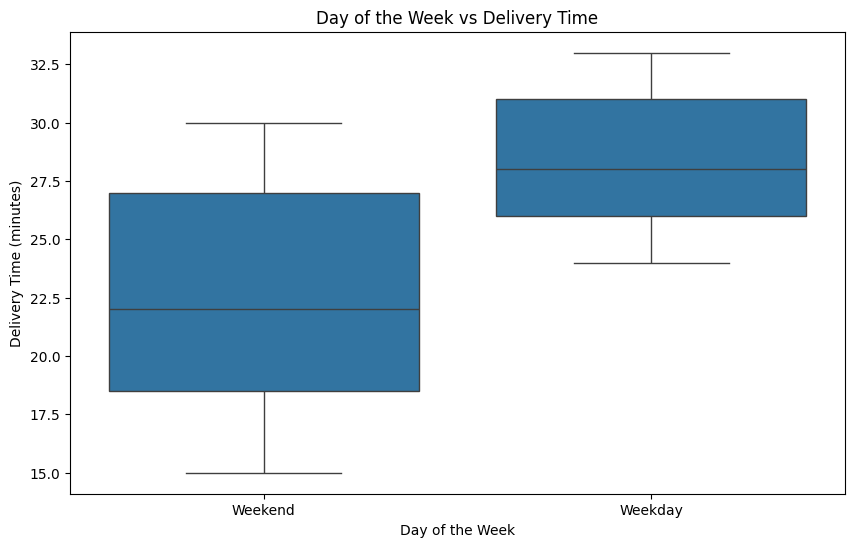

<ipython-input-40-ac0b7aa772dd>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index, palette='coolwarm')


restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Sush

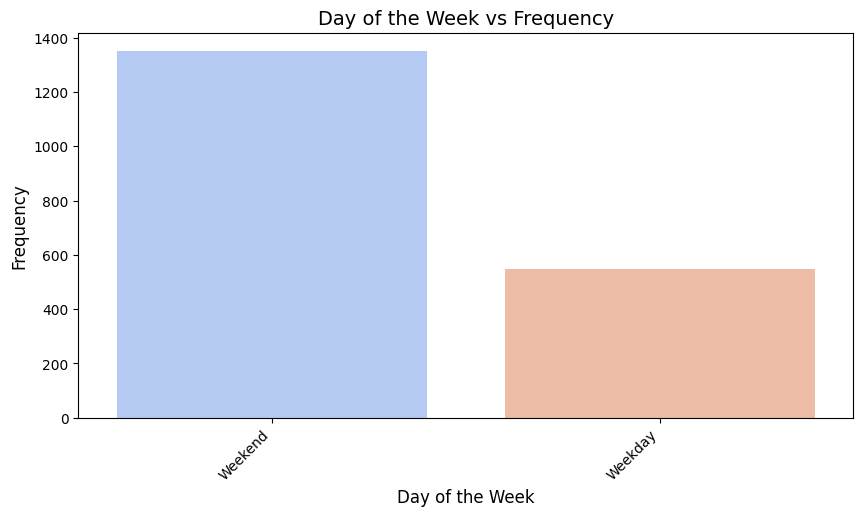

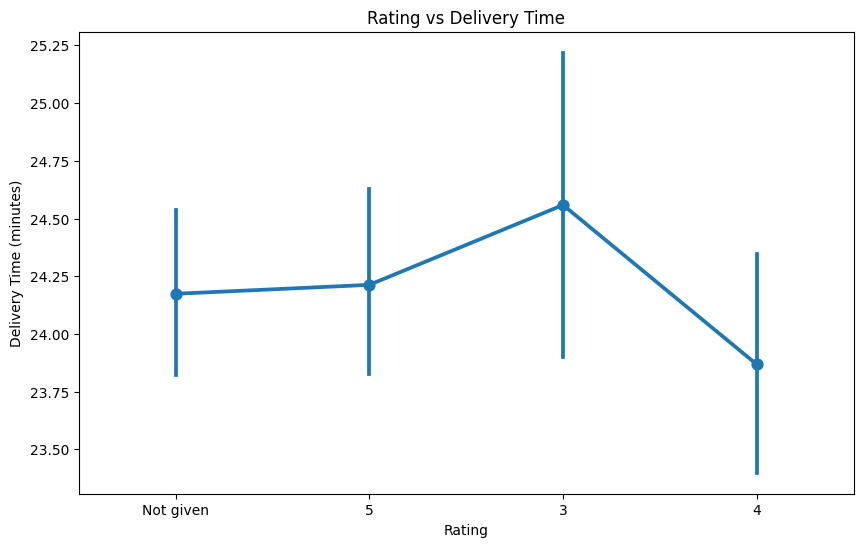

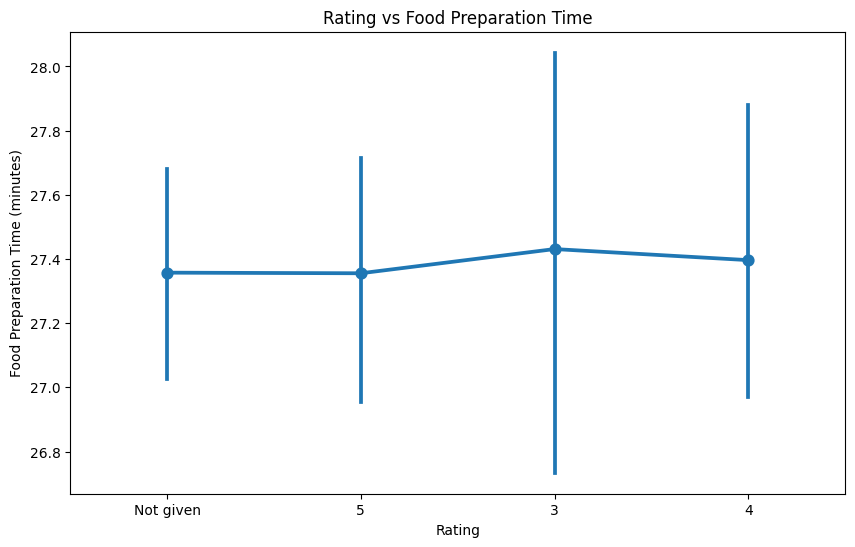

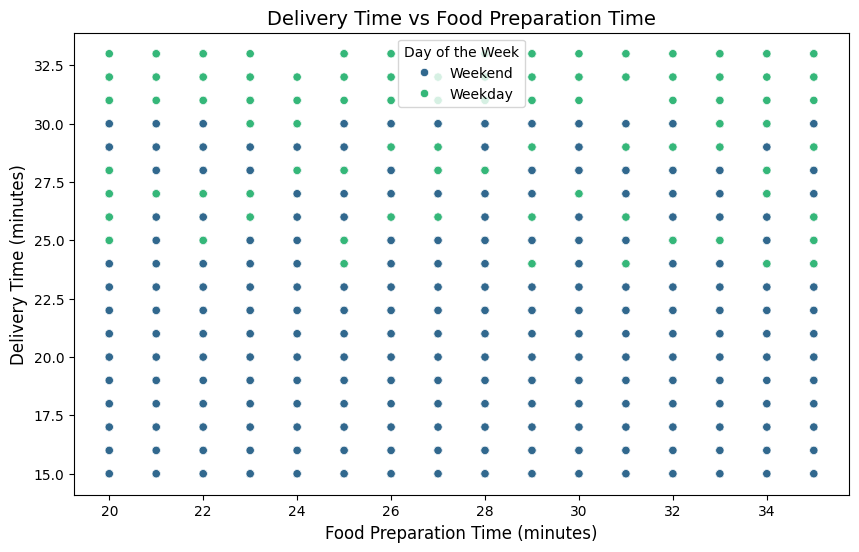

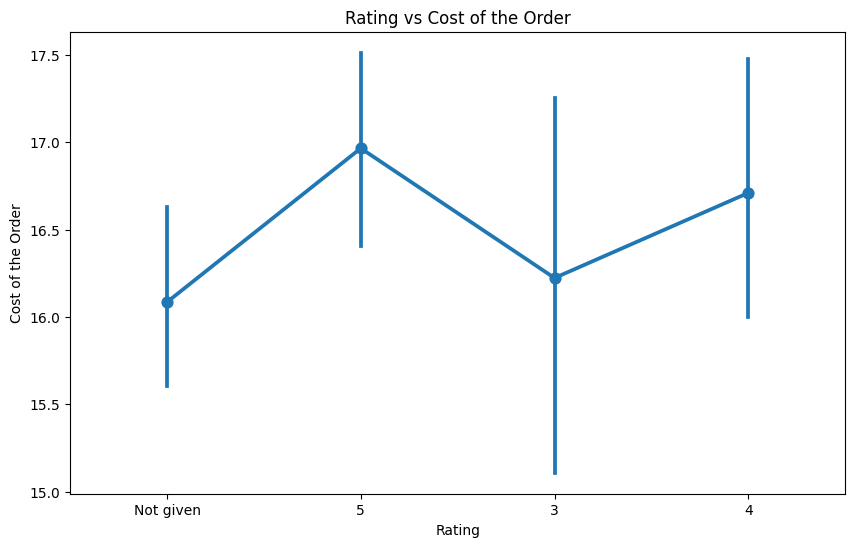

<ipython-input-40-ac0b7aa772dd>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cuisine_type', y='rating', palette='magma', order=df['cuisine_type'].value_counts().index)


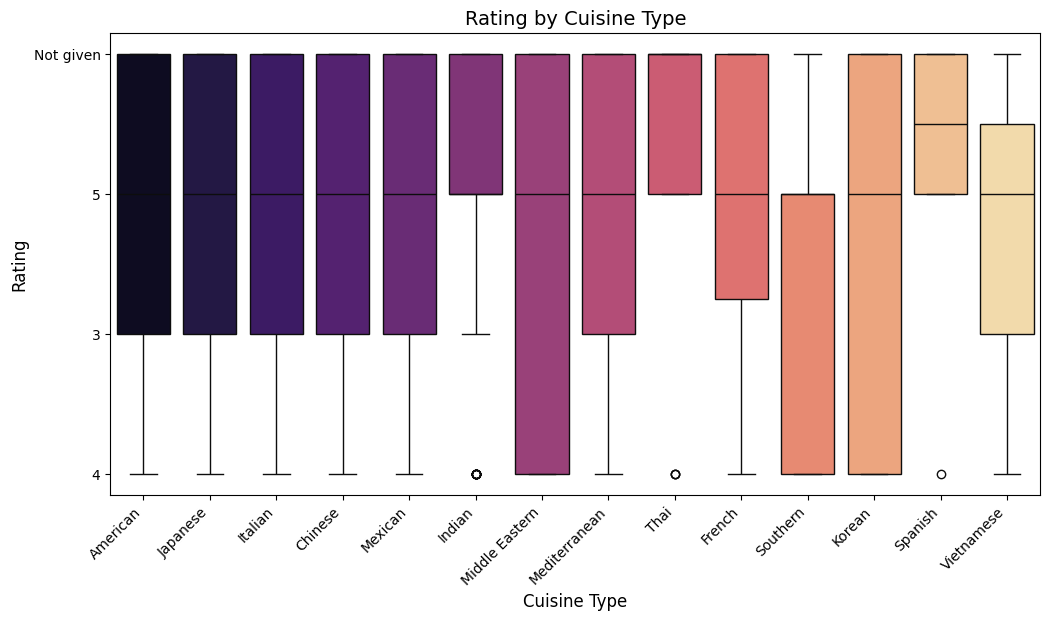

<ipython-input-40-ac0b7aa772dd>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=sorted(df['rating'].dropna().unique()), palette='magma')


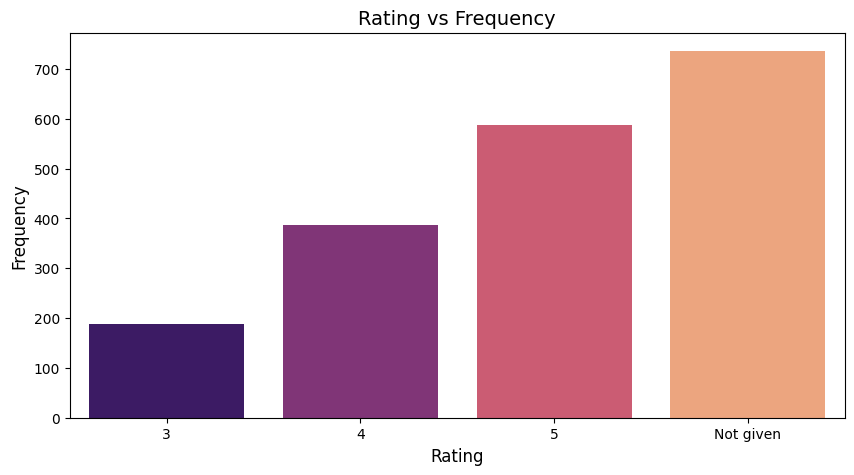

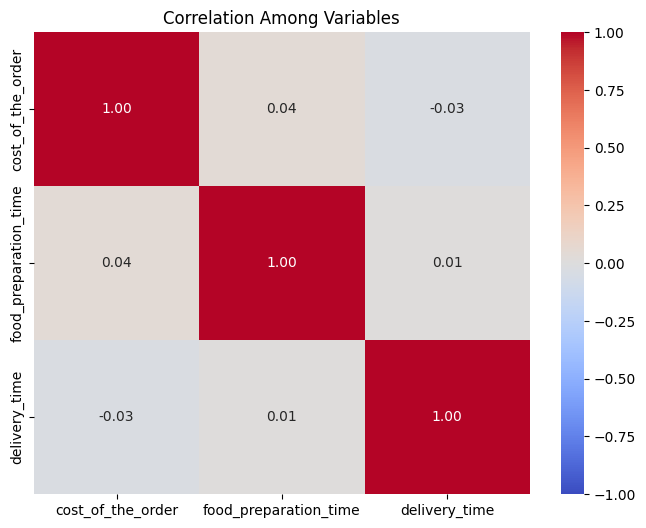

<ipython-input-40-ac0b7aa772dd>:110: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numeric_columns].corr()
/root/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/root/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/root/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/root/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **k

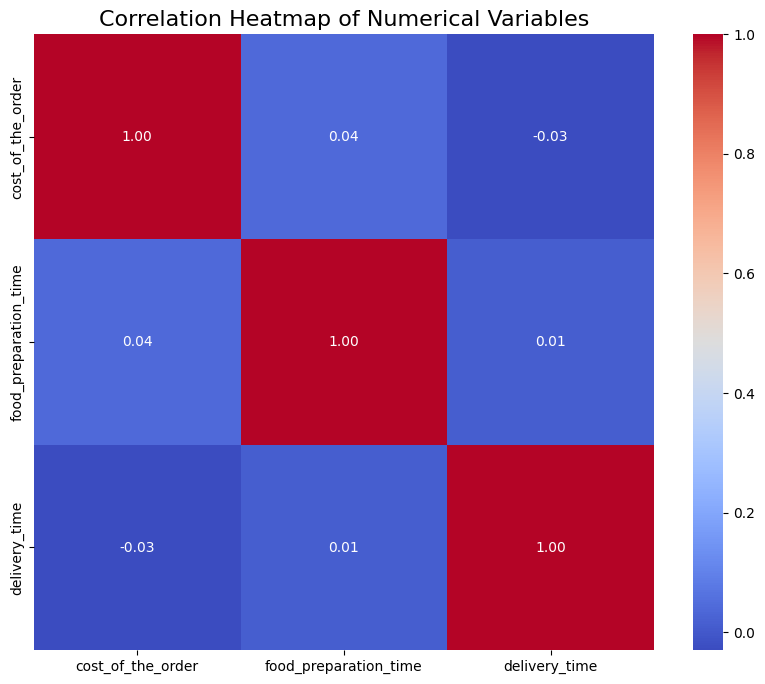

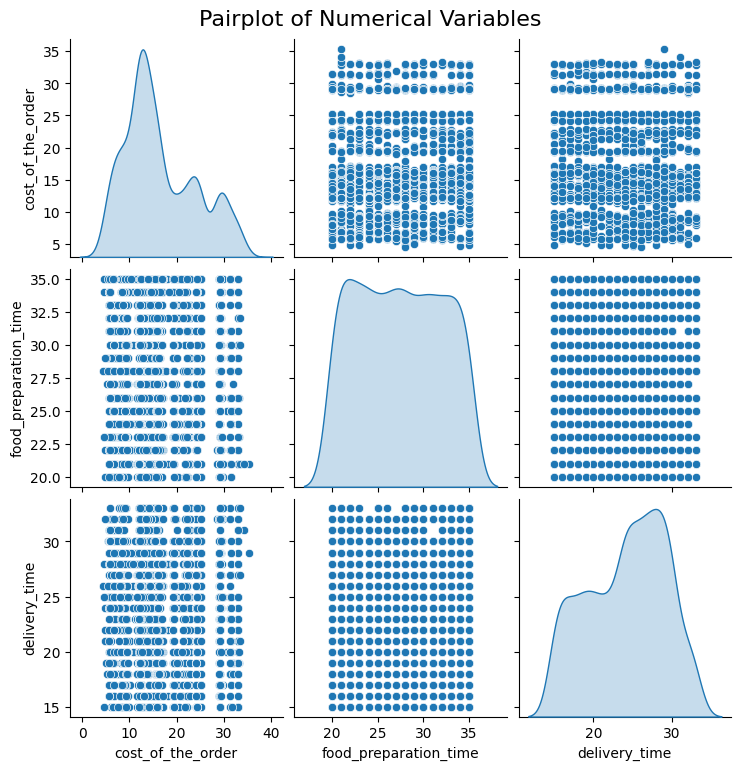

In [ ]:
# Cost of the Order vs Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', palette='coolwarm')
plt.title('Cost of the Order by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Cost of the Order', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Cuisine vs Cost of the Order
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.title('Cuisine vs Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.show()

# Cuisine vs Food Preparation Time
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=45)
plt.title('Cuisine vs Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

# Day of the Week vs Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Day of the Week vs Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Plot: Day of the Week vs Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index, palette='coolwarm')
plt.title('Day of the Week vs Frequency', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Revenue Generated by Restaurants
# Top 50 restaurants by revenue
restaurant_revenue = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(50)
print(restaurant_revenue)

#Rating vs Delivery Time
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='rating', y='delivery_time')
plt.title('Rating vs Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

#Rating vs Food Preparation Time
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='rating', y='food_preparation_time')
plt.title('Rating vs Food Preparation Time')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

# Delivery Time vs Food Preparation Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', hue='day_of_the_week', palette='viridis')
plt.title('Delivery Time vs Food Preparation Time', fontsize=14)
plt.xlabel('Food Preparation Time (minutes)', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.legend(title='Day of the Week')
plt.show()

#Rating vs Cost of the Order
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.title('Rating vs Cost of the Order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

# Rating vs Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='rating', palette='magma', order=df['cuisine_type'].value_counts().index)
plt.title('Rating by Cuisine Type', fontsize=14)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Rating vs Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=sorted(df['rating'].dropna().unique()), palette='magma')
plt.title('Rating vs Frequency', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#Correlation Among Variables
# Correlation Heatmap
plt.figure(figsize=(8, 6))
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Among Variables')
plt.show()

# Multivariate Analysis
# Heatmap to show correlations between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)

# Pairplot for numerical variables
sns.pairplot(df[numeric_columns], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=16)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = pd.to_numeric(df_rated['rating'], errors='coerce')

# Count the number of ratings for each restaurant and filter for more than 50 ratings
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().reset_index()
filtered_restaurants = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter the original DataFrame to include only these restaurants
df_filtered = df_rated[df_rated['restaurant_name'].isin(filtered_restaurants)]

# Calculate the mean rating for these restaurants
df_mean_rating = df_filtered.groupby(['restaurant_name'])['rating'].mean().reset_index()

# Filter for average rating greater than 4 and sort
df_avg_rating_greater_than_4 = df_mean_rating[df_mean_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

The top-rated restaurants with over 50 ratings and an average rating greater than 4 are The Meatball Shop (4.51), Blue Ribbon Fried Chicken (4.33), Shake Shack (4.28), and Blue Ribbon Sushi (4.22), showcasing their consistent customer satisfaction.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to calculate revenue
def compute_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the revenue calculation
df['Revenue'] = df['cost_of_the_order'].apply(compute_revenue)
df.head()

# Calculate total revenue
total_revenue = df['Revenue'].sum()
print(f'The total net revenue generated by the company is: ${total_revenue:.2f}')

The total net revenue generated by the company is: $6166.30


#### Observations:
The company generated a total net revenue of $6,166.30, indicating the effectiveness of its pricing and revenue model based on order costs.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find orders with total time > 60 minutes
orders_above_60 = df[df['total_time'] > 60]

# Calculate the percentage
percentage_above_60 = (orders_above_60.shape[0] / df.shape[0]) * 100
print(f'{percentage_above_60:.2f}% of orders take more than 60 minutes to be delivered.')

10.54% of orders take more than 60 minutes to be delivered.


#### Observations:
Only 10.54% of orders take more than 60 minutes for delivery, indicating that the majority of orders are fulfilled within an hour, showcasing operational efficiency.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Mean delivery time on weekdays
weekday_mean_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Mean delivery time on weekends
weekend_mean_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(f'The mean delivery time on weekdays is: {weekday_mean_time:.2f} minutes')
print(f'The mean delivery time on weekends is: {weekend_mean_time:.2f} minutes')

The mean delivery time on weekdays is: 28.34 minutes
The mean delivery time on weekends is: 22.47 minutes


#### Observations:
Delivery times are faster on weekends (22.47 minutes) compared to weekdays (28.34 minutes), suggesting better efficiency or lighter traffic during weekends.It also might indicate that there are more available drivers possible only work on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Orders on weekends tend to take longer for delivery compared to weekdays.

* Certain cuisines have higher preparation times, affecting the total delivery time.

* Popular cuisines on weekends could be leveraged to design targeted promotions.

* Ratings and feedback are key indicators of restaurant performance and customer satisfaction.




### Recommendations:

* Focus on improving the preparation and delivery efficiency for high-demand cuisines.

* Incentivize restaurants with better ratings and consistent performance to maintain quality.

* Offer promotional discounts or benefits for top-rated restaurants to drive customer loyalty.

* Analyze peak demand times and allocate additional delivery resources for weekends.

* Enhance customer satisfaction by addressing delivery time and cost concerns.  

---